In [1]:
# Import the necessary library we need for our data preparation: pandas package:
import pandas as pd

In [2]:
# Read in csv file containing data from consumer survey:
PC_area = pd.read_csv('data/organic_croparea_percentage_eu.csv')

In [3]:
# Show dataframe:
PC_area

,DATAFLOW,LAST UPDATE,freq,unit,crops,agprdmet,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,AL,2021,0.09,NaN
1,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,AT,2013,18.40,NaN
2,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,AT,2014,19.35,NaN
3,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,AT,2015,20.30,NaN
4,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,AT,2016,21.25,NaN
...,...,...,...,...,...,...,...,...,...,...
297,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,UK,2015,2.89,NaN
298,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,UK,2016,2.82,NaN
299,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,UK,2017,2.85,NaN
300,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,PC_UAA,UAAXK0000,TOTAL,UK,2018,2.64,NaN


In [4]:
# Show dataframe info:
PC_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     302 non-null    object 
 1   LAST UPDATE  302 non-null    object 
 2   freq         302 non-null    object 
 3   unit         302 non-null    object 
 4   crops        302 non-null    object 
 5   agprdmet     302 non-null    object 
 6   geo          302 non-null    object 
 7   TIME_PERIOD  302 non-null    int64  
 8   OBS_VALUE    302 non-null    float64
 9   OBS_FLAG     15 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 23.7+ KB


In [5]:
PC_area_clean = PC_area.drop(['DATAFLOW', 'LAST UPDATE','freq','crops','agprdmet','OBS_FLAG','unit'], axis=1)
PC_area_clean

,geo,TIME_PERIOD,OBS_VALUE
0,AL,2021,0.09
1,AT,2013,18.40
2,AT,2014,19.35
3,AT,2015,20.30
4,AT,2016,21.25
...,...,...,...
297,UK,2015,2.89
298,UK,2016,2.82
299,UK,2017,2.85
300,UK,2018,2.64


In [6]:
PC_area_clean = PC_area_clean.rename(columns={'geo': 'country_ID', 'TIME_PERIOD': 'year',
                                         'OBS_VALUE': 'Prcnt_to_year_before'})
PC_area_clean

,country_ID,year,Prcnt_to_year_before
0,AL,2021,0.09
1,AT,2013,18.40
2,AT,2014,19.35
3,AT,2015,20.30
4,AT,2016,21.25
...,...,...,...
297,UK,2015,2.89
298,UK,2016,2.82
299,UK,2017,2.85
300,UK,2018,2.64


<BarContainer object of 302 artists>

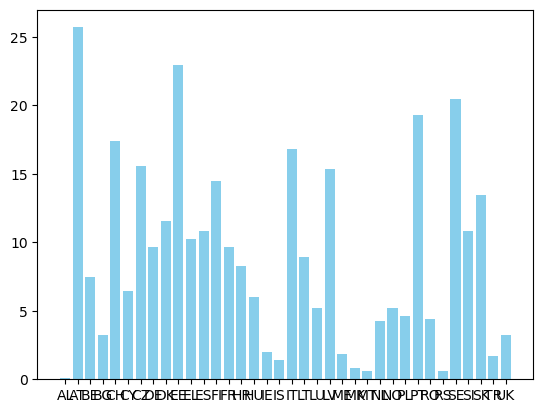

In [7]:
# Let's make a diagram, for this we import library matplotlib
import matplotlib.pyplot as plt

plt.bar(PC_area_clean['country_ID'], PC_area_clean['Prcnt_to_year_before'], color='skyblue')

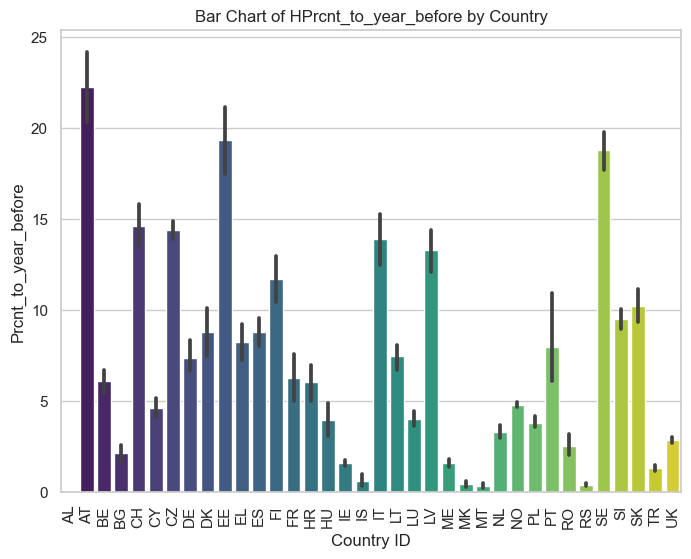

In [8]:
# import seaborn
import seaborn as sns
# setting the style seaborn
sns.set(style="whitegrid")
# building a barchart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='country_ID', y='Prcnt_to_year_before', data=PC_area_clean, palette='viridis')
plt.xlabel('Country ID')
plt.ylabel('Prcnt_to_year_before')
plt.title('Bar Chart of Prcnt_to_year_before by Country')
plt.xticks(rotation=90)
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


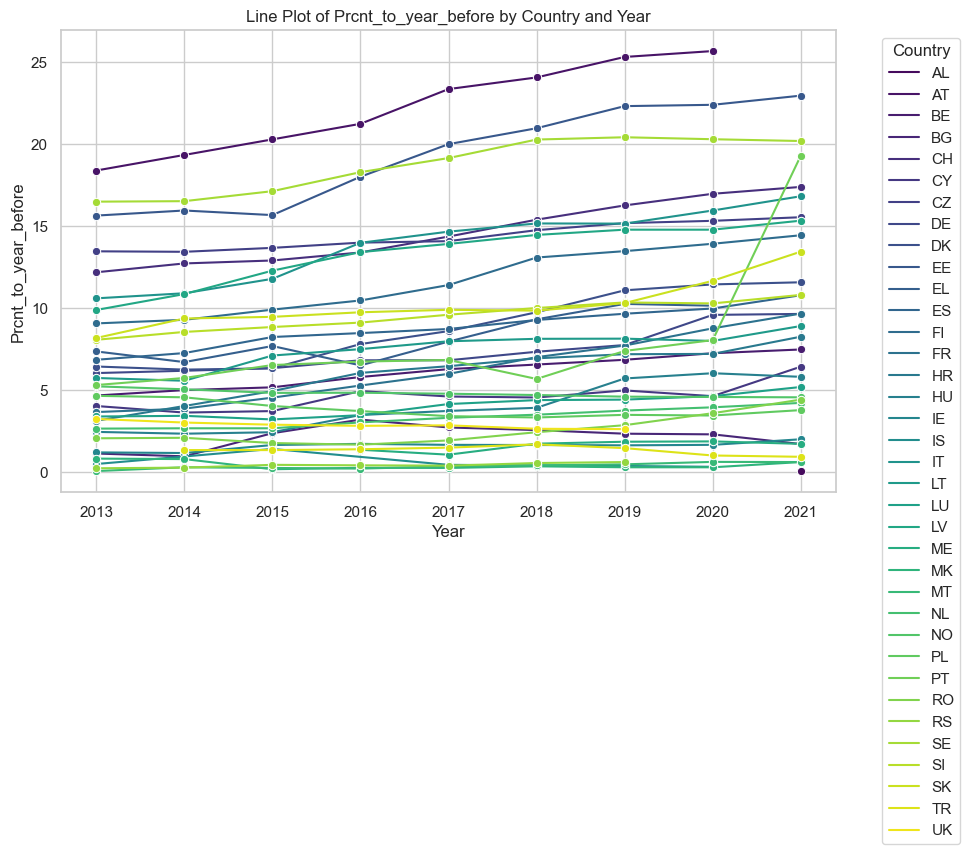

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Prcnt_to_year_before', hue='country_ID', data=PC_area_clean, palette='viridis', marker='o')
plt.xlabel('Year')
plt.ylabel('Prcnt_to_year_before')
plt.title('Line Plot of Prcnt_to_year_before by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

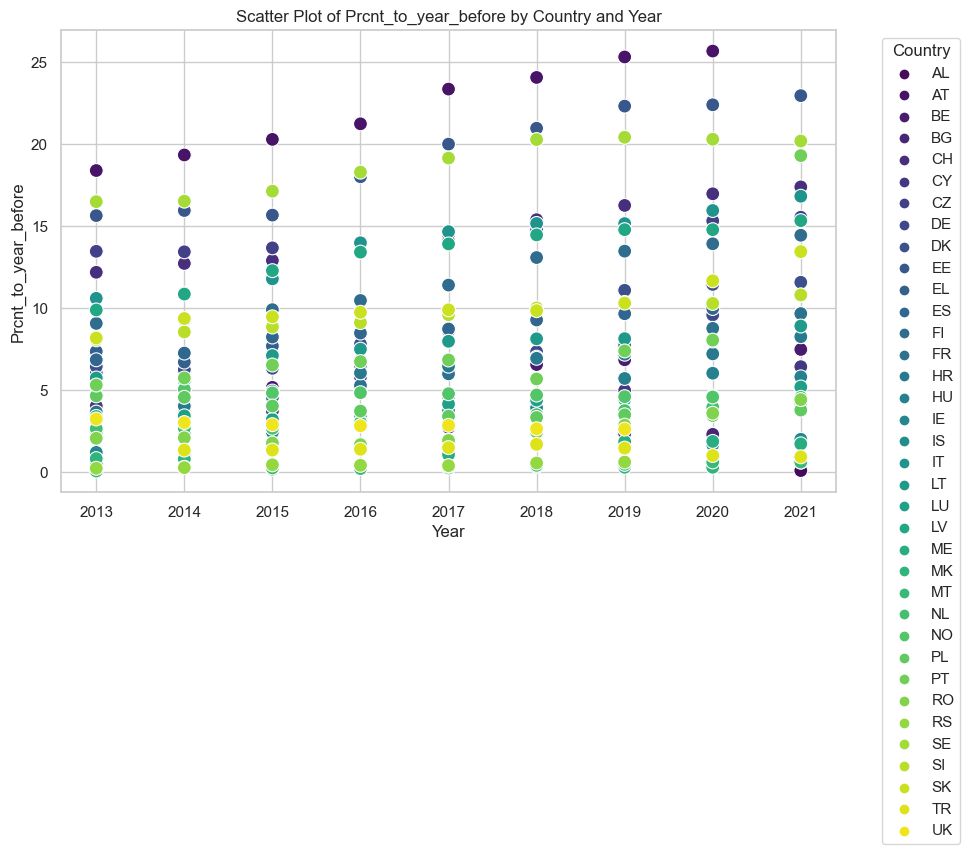

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Prcnt_to_year_before', hue='country_ID', data=PC_area_clean, palette='viridis', s=100)
plt.xlabel('Year')
plt.ylabel('Prcnt_to_year_before')
plt.title('Scatter Plot of Prcnt_to_year_before by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


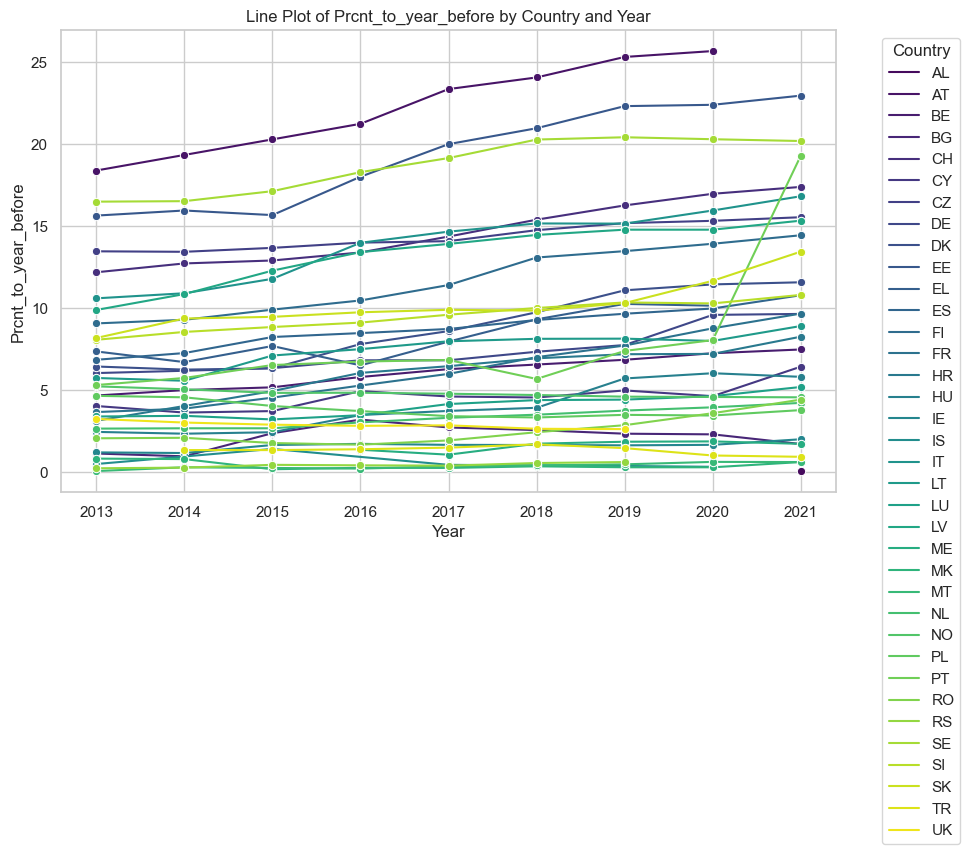

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Prcnt_to_year_before', hue='country_ID', data=PC_area_clean, palette='viridis', marker='o')
plt.xlabel('Year')
plt.ylabel('Prcnt_to_year_before')
plt.title('Line Plot of Prcnt_to_year_before by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
import sql_functions as sqlf
engine = sqlf.get_engine()
schema = 'capstone_organicfood'
table_name = 'organic_croparea_prcntg_eu'
import psycopg2

In [14]:
if engine!=None:
    try:
        PC_area_clean.to_sql(name=table_name, # name of SQL table variable
                        con=engine, # engine or connection
                        schema=schema, # our class schema variable
                        if_exists='replace', # Drop the table before inserting new values
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
else:
    print('No engine')

The organic_croparea_prcntg_eu table was imported successfully.


In [15]:
# Test: query the newly created table to count the rows (we know from above that the dataframe has 108 cases):
sqlf.get_dataframe(f'SELECT COUNT(*) FROM {schema}.organic_croparea_prcntg_eu;')

,count
0,302
